# Logistic Regression

You are provided with a dataset available in the Google Drive folder at the following link:
https://drive.google.com/drive/folders/1NB2zIk679jlZC1x0gZPS4ugfHIO1aq1p

The dataset contains information related to social network advertisements, including user attributes such as age and estimated salary, along with a binary target variable indicating whether a user purchased the advertised product or not.

The goal is to build a Logistic Regression classification model to predict whether a user will purchase the advertised product based on their Age and Estimated Salary.

Perform the following tasks:

## Importing the libraries

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

## Importing the dataset

In [6]:
data_stuff = pd.read_csv("Social_Network_Ads.csv")
print(data_stuff)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


## Select Features and Target Variable



In [7]:
#First remove the userID from data set
data_stuff = data_stuff.drop("User ID", axis = 1)
print(data_stuff)

     Gender  Age  EstimatedSalary  Purchased
0      Male   19            19000          0
1      Male   35            20000          0
2    Female   26            43000          0
3    Female   27            57000          0
4      Male   19            76000          0
..      ...  ...              ...        ...
395  Female   46            41000          1
396    Male   51            23000          1
397  Female   50            20000          1
398    Male   36            33000          0
399  Female   49            36000          1

[400 rows x 4 columns]


In [8]:
#Next, change the gender data into numerical data, assigning -1 to Male and 1 to Female
data_stuff["Gender"] = data_stuff["Gender"].map({"Male": -1, "Female": 1})
print(data_stuff)

     Gender  Age  EstimatedSalary  Purchased
0        -1   19            19000          0
1        -1   35            20000          0
2         1   26            43000          0
3         1   27            57000          0
4        -1   19            76000          0
..      ...  ...              ...        ...
395       1   46            41000          1
396      -1   51            23000          1
397       1   50            20000          1
398      -1   36            33000          0
399       1   49            36000          1

[400 rows x 4 columns]


In [9]:
#Defining the target and the features
features = data_stuff.drop("Purchased", axis = 1).values
targets = data_stuff["Purchased"].values
print(features)
print(targets)

[[   -1    19 19000]
 [   -1    35 20000]
 [    1    26 43000]
 ...
 [    1    50 20000]
 [   -1    36 33000]
 [    1    49 36000]]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1
 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0
 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0
 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1]


## Splitting the dataset into the Training set and Test set

In [10]:
x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size = 0.2, stratify=targets)
print(x_train, x_test, y_train, y_test)

[[    -1     36 144000]
 [     1     52  38000]
 [     1     33 149000]
 [    -1     28  32000]
 [     1     41  72000]
 [    -1     37  53000]
 [     1     26  52000]
 [    -1     60  42000]
 [     1     27  96000]
 [     1     59  29000]
 [    -1     35 108000]
 [    -1     41  72000]
 [     1     49  36000]
 [     1     44 139000]
 [     1     19  21000]
 [    -1     24  84000]
 [     1     37  78000]
 [     1     27  84000]
 [     1     41  71000]
 [    -1     40  57000]
 [     1     35  77000]
 [     1     38 112000]
 [    -1     23  20000]
 [     1     29  83000]
 [     1     47  50000]
 [     1     40  75000]
 [     1     31  34000]
 [    -1     35  55000]
 [    -1     42  54000]
 [    -1     48  90000]
 [    -1     41  52000]
 [    -1     43 129000]
 [    -1     42  54000]
 [     1     38 113000]
 [     1     19  26000]
 [    -1     23  63000]
 [    -1     53  72000]
 [    -1     42 149000]
 [     1     47 113000]
 [    -1     39  71000]
 [     1     23  82000]
 [    -1     40 

## Feature Scaling

In [11]:
scaler = StandardScaler()
x_train_s = scaler.fit_transform(x_train)
x_test_s = scaler.transform(x_test)
print(x_train_s)
print(x_test_s)

[[-0.99376941 -0.16160906  2.19291415]
 [ 1.00626965  1.34556466 -0.92054481]
 [ 1.00626965 -0.44420413  2.33977542]
 [-0.99376941 -0.91519592 -1.09677834]
 [ 1.00626965  0.30938273  0.07811184]
 [-0.99376941 -0.0674107  -0.47996099]
 [ 1.00626965 -1.10359263 -0.50933325]
 [-0.99376941  2.09915152 -0.80305579]
 [ 1.00626965 -1.00939427  0.78304594]
 [ 1.00626965  2.00495316 -1.1848951 ]
 [-0.99376941 -0.25580741  1.135513  ]
 [-0.99376941  0.30938273  0.07811184]
 [ 1.00626965  1.06296959 -0.97928932]
 [ 1.00626965  0.5919778   2.04605288]
 [ 1.00626965 -1.76298113 -1.41987313]
 [-0.99376941 -1.29198934  0.43057889]
 [ 1.00626965 -0.0674107   0.25434537]
 [ 1.00626965 -1.00939427  0.43057889]
 [ 1.00626965  0.30938273  0.04873958]
 [-0.99376941  0.21518437 -0.36247198]
 [ 1.00626965 -0.25580741  0.22497311]
 [ 1.00626965  0.02678766  1.25300201]
 [-0.99376941 -1.3861877  -1.44924539]
 [ 1.00626965 -0.82099756  0.40120664]
 [ 1.00626965  0.87457287 -0.56807776]
 [ 1.00626965  0.21518437

## Training the Logistic Regression model on the Training set

In [12]:
reg = linear_model.LogisticRegression()
reg.fit(x_train_s, y_train)

LogisticRegression()

## Predicting the Test set results

In [13]:
y_predicted = reg.predict(x_test_s)
print("Accuracy: ", accuracy_score(y_test, y_predicted))
print()
for i in range(len(y_predicted)):
  print(y_test[i], y_predicted[i])

Accuracy:  0.775

0 0
1 0
1 0
0 1
0 1
0 0
0 0
1 0
1 0
1 1
1 0
0 0
0 0
1 1
0 0
1 1
1 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 1
1 1
1 0
0 0
0 1
1 1
1 0
0 0
0 0
1 1
0 0
1 1
0 0
1 0
0 0
0 0
1 1
1 1
0 0
1 1
1 1
1 1
0 0
0 0
0 0
1 0
0 0
0 1
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
1 1
0 0
0 0
1 1
1 0
1 1
0 0
0 1
1 1
0 0
0 0
0 0
0 0


## Making the Confusion Matrix

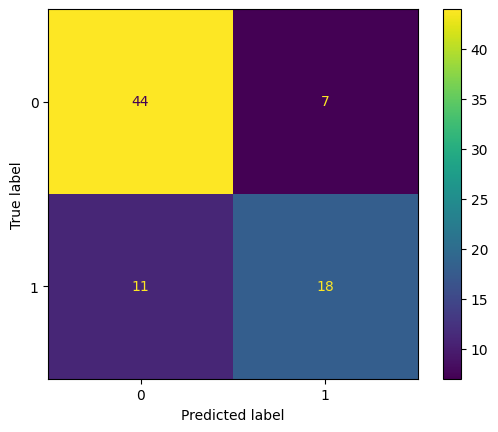

In [14]:
cm = confusion_matrix(y_test, y_predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

## Visualising the Training set results

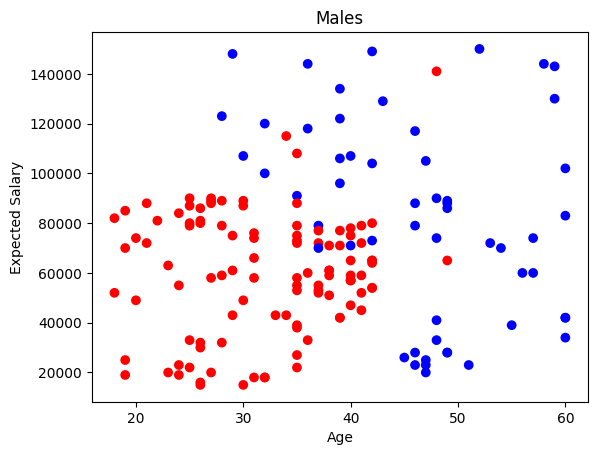

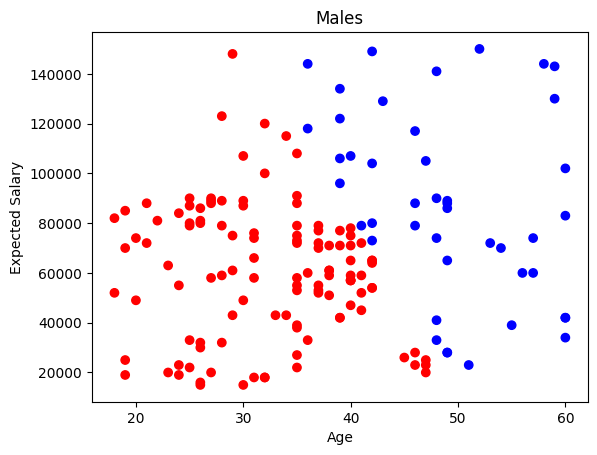

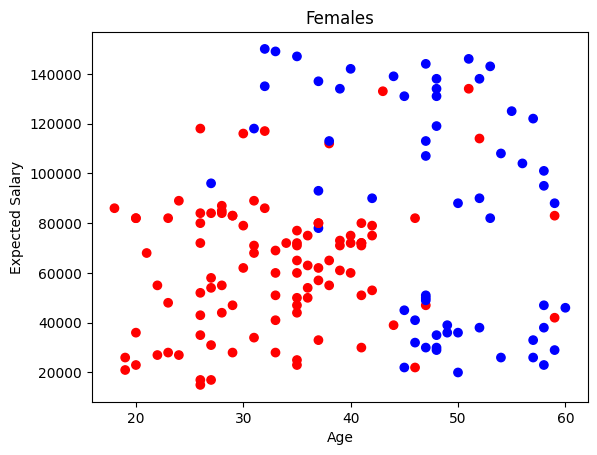

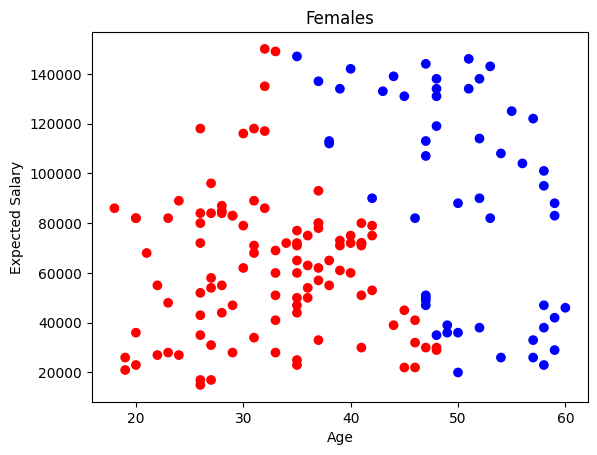

In [17]:
#for males real data
xs1 = [i[1] for i in x_train if i[0] == -1]
xs2 = [i[2] for i in x_train if i[0] == -1]
ys = [y_train[i] for i in range(len(y_train)) if x_train[i][0] == -1]
colours = [{1:"blue", 0:"red"}[i] for i in ys]
plt.scatter(xs1, xs2, color = colours)
plt.title("Males")
plt.xlabel("Age")
plt.ylabel("Expected Salary")
plt.show()

#for males predicted
xs1 = [i[1] for i in x_train if i[0] == -1]
xs2 = [i[2] for i in x_train if i[0] == -1]
ys = [reg.predict(x_train_s)[i] for i in range(len(y_train)) if x_train[i][0] == -1]
colours = [{1:"blue", 0:"red"}[i] for i in ys]
plt.scatter(xs1, xs2, color = colours)
plt.title("Males (predicted)")
plt.xlabel("Age")
plt.ylabel("Expected Salary")
plt.show()

#for females
xs1 = [i[1] for i in x_train if i[0] == 1]
xs2 = [i[2] for i in x_train if i[0] == 1]
ys = [y_train[i] for i in range(len(y_train)) if x_train[i][0] == 1]
colours = [{1:"blue", 0:"red"}[i] for i in ys]
plt.scatter(xs1, xs2, color = colours)
plt.title("Females")
plt.xlabel("Age")
plt.ylabel("Expected Salary")
plt.show()


xs1 = [i[1] for i in x_train if i[0] == 1]
xs2 = [i[2] for i in x_train if i[0] == 1]
ys = [reg.predict(x_train_s)[i] for i in range(len(y_train)) if x_train[i][0] == 1]
colours = [{1:"blue", 0:"red"}[i] for i in ys]
plt.scatter(xs1, xs2, color = colours)
plt.title("Females (predicted)")
plt.xlabel("Age")
plt.ylabel("Expected Salary")
plt.show()

#red means not purchased while blue means purchased


## Visualising the Test set results

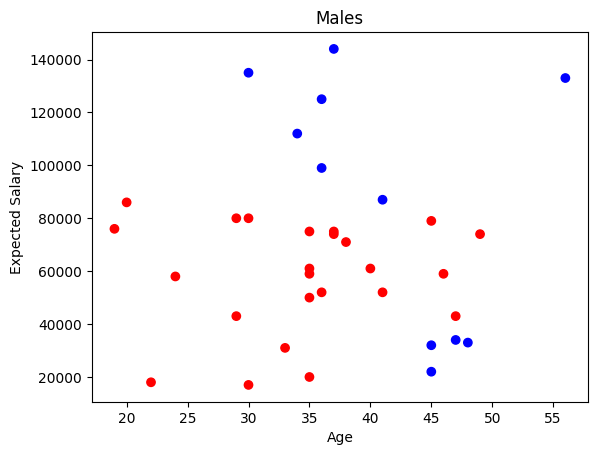

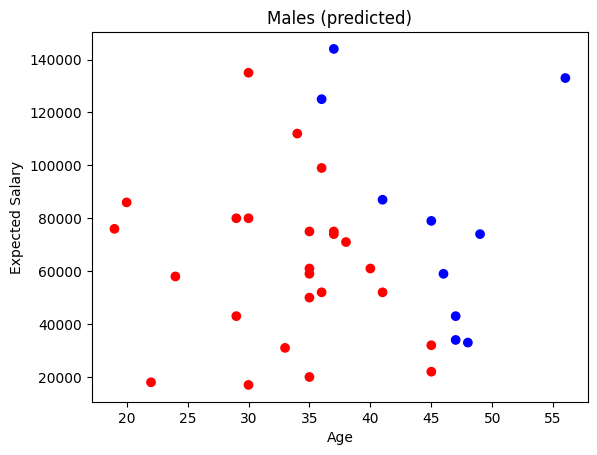

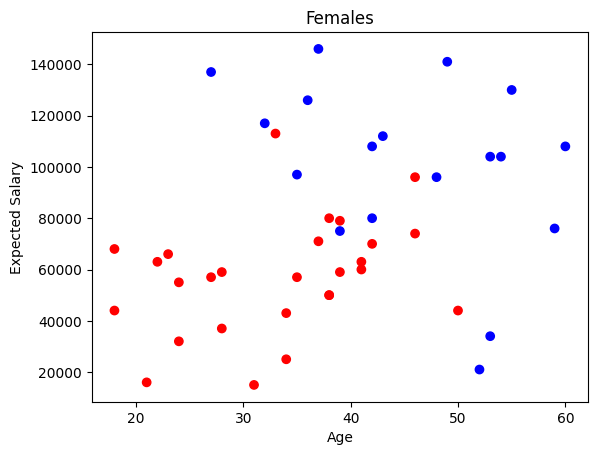

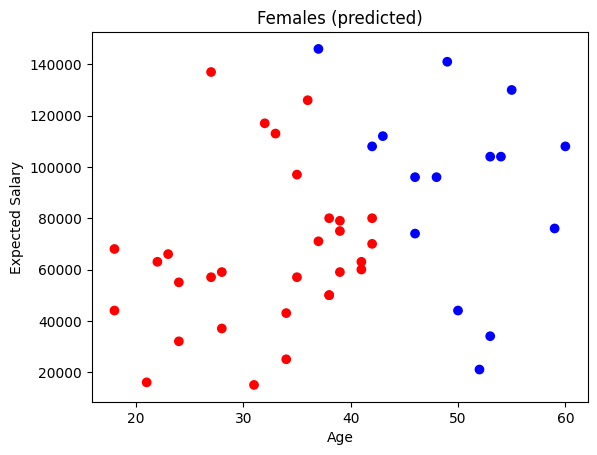

In [19]:
#for males
xs1 = [i[1] for i in x_test if i[0] == -1]
xs2 = [i[2] for i in x_test if i[0] == -1]
ys = [y_test[i] for i in range(len(y_test)) if x_test[i][0] == -1]
colours = [{1:"blue", 0:"red"}[i] for i in ys]
plt.scatter(xs1, xs2, color = colours)
plt.title("Males")
plt.xlabel("Age")
plt.ylabel("Expected Salary")
plt.show()

xs1 = [i[1] for i in x_test if i[0] == -1]
xs2 = [i[2] for i in x_test if i[0] == -1]
ys = [y_predicted[i] for i in range(len(y_test)) if x_test[i][0] == -1]
colours = [{1:"blue", 0:"red"}[i] for i in ys]
plt.scatter(xs1, xs2, color = colours)
plt.title("Males (predicted)")
plt.xlabel("Age")
plt.ylabel("Expected Salary")
plt.show()

#for females
xs1 = [i[1] for i in x_test if i[0] == 1]
xs2 = [i[2] for i in x_test if i[0] == 1]
ys = [y_test[i] for i in range(len(y_test)) if x_test[i][0] == 1]
colours = [{1:"blue", 0:"red"}[i] for i in ys]
plt.scatter(xs1, xs2, color = colours)
plt.title("Females")
plt.xlabel("Age")
plt.ylabel("Expected Salary")
plt.show()

xs1 = [i[1] for i in x_test if i[0] == 1]
xs2 = [i[2] for i in x_test if i[0] == 1]
ys = [y_predicted[i] for i in range(len(y_test)) if x_test[i][0] == 1]
colours = [{1:"blue", 0:"red"}[i] for i in ys]
plt.scatter(xs1, xs2, color = colours)
plt.title("Females (predicted)")
plt.xlabel("Age")
plt.ylabel("Expected Salary")
plt.show()

#red means not purchased while blue means purchased